In [3]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(H):
    return np.exp(H)/np.sum(np.exp(H),axis=1,keepdims=1)

In [72]:
class ClassifierNeuralNetwork3():
    def __init__(self,InputColumns,OutputColumns,Layer1Nodes,Layer2Nodes):
        self.weights0=np.random.randn(InputColumns,Layer1Nodes)
        self.bias0=np.random.randn(1,Layer1Nodes)
        self.weights1=np.random.randn(Layer1Nodes,Layer2Nodes)
        self.bias1=np.random.randn(1,Layer2Nodes)
        self.weights2=np.random.randn(Layer2Nodes,OutputColumns)
        self.bias2=np.random.randn(1,OutputColumns)
    
    def forward(self,Input):
        self.H0 = Input@self.weights0 + self.bias0
        self.Z0 = np.tanh(self.H0)
        self.H1 = self.Z0@self.weights1 + self.bias1
        self.Z1 = np.tanh(self.H1)
        self.H2 = self.Z1@self.weights2 + self.bias2
        self.Output = softmax(self.H2)
        self.Costs=[]
        #return self.Output
        
    def predict(self,Input):
        self.forward(Input)
        return self.Output
    
    def backward(self,Input,Output):
        self.gradLogit2 = self.Output-Output
        self.gradweights2=self.Z1.T@self.gradLogit2
        self.gradbias2 = np.sum(self.gradLogit2,axis=0,keepdims=1)
        self.gradLogit1 = (self.gradLogit2@self.weights2.T)*(1-self.Z1**2)
        self.gradweights1 = self.Z0.T@(self.gradLogit1)
        self.gradbias1= np.sum(self.gradLogit1,axis=0,keepdims=1)
        self.gradLogit0 = (self.gradLogit1@self.weights1.T)*(1-self.Z0**2)
        self.gradweights0 = Input.T@(self.gradLogit0)
        self.gradbias0 = np.sum(self.gradLogit0,axis=0,keepdims=1)
        
    def fit(self,eta,epochs,X,Y):
        self.Costs=[]
        for i in range(epochs):
            self.forward(X)
            self.backward(X,Y)
            self.Costs.append(-(Y*np.log(self.Output)).sum())
            print('Iteration: {}, Cost:{}'.format(i+1,self.Costs[-1]))
            self.weights2-=eta*self.gradweights2
            self.bias2-=eta*self.gradbias2
            self.weights1-=eta*self.gradweights1
            self.bias1-=eta*self.gradbias1
            self.weights0-=eta*self.gradweights0
            self.bias0-=eta*self.gradbias0

In [75]:
N = 500
b = 3
Data = np.vstack((np.hstack((np.random.randn(N,2)+[[b,b]],[[1,0,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[-b,0]],[[0,1,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[b,-b]],[[0,0,1]]*N))))

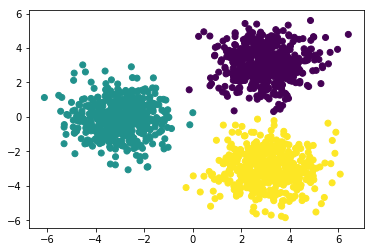

In [76]:
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(Data[:,2:],axis=1))

In [77]:
np.random.shuffle(Data)
model = ClassifierNeuralNetwork3(InputColumns=2,OutputColumns=3,Layer1Nodes=2,Layer2Nodes=2)

In [78]:
model.predict(Data[:,:2])

array([[0.05198015, 0.34578012, 0.60223974],
       [0.30486553, 0.52849865, 0.16663582],
       [0.0369464 , 0.32722119, 0.63583242],
       ...,
       [0.0454879 , 0.33920612, 0.61530597],
       [0.30683621, 0.52849151, 0.16467227],
       [0.04478217, 0.33840607, 0.61681176]])

In [79]:
model.backward(Data[:,:2],Data[:,2:])

In [80]:
model.fit(eta=1e-3,epochs=2000,X=Data[:,:2],Y=Data[:,2:])

Iteration: 1, Cost:2253.9126913104865
Iteration: 2, Cost:1235.5859382324966
Iteration: 3, Cost:812.5091077057987
Iteration: 4, Cost:586.7210312647458
Iteration: 5, Cost:445.1227380201577
Iteration: 6, Cost:345.53879455258743
Iteration: 7, Cost:275.4675673254118
Iteration: 8, Cost:225.78921472491945
Iteration: 9, Cost:189.77381975663127
Iteration: 10, Cost:162.92427293954404
Iteration: 11, Cost:142.3686100094041
Iteration: 12, Cost:126.28215141906199
Iteration: 13, Cost:113.4611291634894
Iteration: 14, Cost:103.0742926900535
Iteration: 15, Cost:94.53073884135404
Iteration: 16, Cost:87.40208196425911
Iteration: 17, Cost:81.37309254269829
Iteration: 18, Cost:76.20953975797515
Iteration: 19, Cost:71.73615843282212
Iteration: 20, Cost:67.82074847070963
Iteration: 21, Cost:64.3624850686674
Iteration: 22, Cost:61.28341520555174
Iteration: 23, Cost:58.52237941710156
Iteration: 24, Cost:56.0307065884306
Iteration: 25, Cost:53.76915557749699
Iteration: 26, Cost:51.705716807014994
Iteration: 27, 

Iteration: 281, Cost:6.200254381288647
Iteration: 282, Cost:6.184648004847338
Iteration: 283, Cost:6.169138391511801
Iteration: 284, Cost:6.153724546646874
Iteration: 285, Cost:6.1384054898905696
Iteration: 286, Cost:6.123180254894455
Iteration: 287, Cost:6.108047889069781
Iteration: 288, Cost:6.093007453339086
Iteration: 289, Cost:6.078058021893237
Iteration: 290, Cost:6.063198681953754
Iteration: 291, Cost:6.048428533540237
Iteration: 292, Cost:6.033746689242816
Iteration: 293, Cost:6.019152273999443
Iteration: 294, Cost:6.004644424877987
Iteration: 295, Cost:5.990222290862974
Iteration: 296, Cost:5.975885032646783
Iteration: 297, Cost:5.961631822425315
Iteration: 298, Cost:5.947461843697945
Iteration: 299, Cost:5.93337429107167
Iteration: 300, Cost:5.9193683700693445
Iteration: 301, Cost:5.9054432969419395
Iteration: 302, Cost:5.891598298484675
Iteration: 303, Cost:5.8778326118569435
Iteration: 304, Cost:5.864145484405975
Iteration: 305, Cost:5.850536173494131
Iteration: 306, Cost:5

Iteration: 578, Cost:3.717452096311285
Iteration: 579, Cost:3.712876262930033
Iteration: 580, Cost:3.708314136128001
Iteration: 581, Cost:3.7037656570894018
Iteration: 582, Cost:3.6992307673632254
Iteration: 583, Cost:3.6947094088597794
Iteration: 584, Cost:3.690201523847411
Iteration: 585, Cost:3.6857070549490802
Iteration: 586, Cost:3.6812259451390545
Iteration: 587, Cost:3.6767581377396685
Iteration: 588, Cost:3.6723035764180816
Iteration: 589, Cost:3.6678622051830287
Iteration: 590, Cost:3.663433968381691
Iteration: 591, Cost:3.6590188106965105
Iteration: 592, Cost:3.6546166771420676
Iteration: 593, Cost:3.6502275130620756
Iteration: 594, Cost:3.6458512641262337
Iteration: 595, Cost:3.641487876327239
Iteration: 596, Cost:3.6371372959778396
Iteration: 597, Cost:3.632799469707825
Iteration: 598, Cost:3.628474344461072
Iteration: 599, Cost:3.6241618674927283
Iteration: 600, Cost:3.619861986366267
Iteration: 601, Cost:3.6155746489506546
Iteration: 602, Cost:3.611299803417575
Iteration:

Iteration: 874, Cost:2.783332439253536
Iteration: 875, Cost:2.7811619834396737
Iteration: 876, Cost:2.7789959287741306
Iteration: 877, Cost:2.7768342586689876
Iteration: 878, Cost:2.774676956600139
Iteration: 879, Cost:2.7725240061071914
Iteration: 880, Cost:2.7703753907932454
Iteration: 881, Cost:2.768231094324692
Iteration: 882, Cost:2.766091100431096
Iteration: 883, Cost:2.7639553929049363
Iteration: 884, Cost:2.7618239556014696
Iteration: 885, Cost:2.7596967724385584
Iteration: 886, Cost:2.7575738273964507
Iteration: 887, Cost:2.7554551045176288
Iteration: 888, Cost:2.7533405879066075
Iteration: 889, Cost:2.7512302617297646
Iteration: 890, Cost:2.749124110215166
Iteration: 891, Cost:2.747022117652359
Iteration: 892, Cost:2.7449242683922233
Iteration: 893, Cost:2.7428305468467444
Iteration: 894, Cost:2.7407409374888827
Iteration: 895, Cost:2.7386554248523565
Iteration: 896, Cost:2.7365739935314584
Iteration: 897, Cost:2.7344966281809095
Iteration: 898, Cost:2.732423313515622
Iterati

Iteration: 1148, Cost:2.309415581687687
Iteration: 1149, Cost:2.3080060548293546
Iteration: 1150, Cost:2.3065981759669305
Iteration: 1151, Cost:2.305191939686612
Iteration: 1152, Cost:2.303787340596905
Iteration: 1153, Cost:2.3023843733285503
Iteration: 1154, Cost:2.300983032534404
Iteration: 1155, Cost:2.299583312889414
Iteration: 1156, Cost:2.298185209090451
Iteration: 1157, Cost:2.2967887158562843
Iteration: 1158, Cost:2.2953938279274846
Iteration: 1159, Cost:2.2940005400662993
Iteration: 1160, Cost:2.2926088470566404
Iteration: 1161, Cost:2.291218743703915
Iteration: 1162, Cost:2.289830224835005
Iteration: 1163, Cost:2.2884432852981593
Iteration: 1164, Cost:2.287057919962913
Iteration: 1165, Cost:2.2856741237199927
Iteration: 1166, Cost:2.284291891481257
Iteration: 1167, Cost:2.2829112181796
Iteration: 1168, Cost:2.281532098768871
Iteration: 1169, Cost:2.280154528223783
Iteration: 1170, Cost:2.278778501539872
Iteration: 1171, Cost:2.2774040137333573
Iteration: 1172, Cost:2.27603105

Iteration: 1439, Cost:1.9521219631438689
Iteration: 1440, Cost:1.951034501376338
Iteration: 1441, Cost:1.9499477953403102
Iteration: 1442, Cost:1.9488618436811458
Iteration: 1443, Cost:1.9477766450525507
Iteration: 1444, Cost:1.9466921981165624
Iteration: 1445, Cost:1.945608501543492
Iteration: 1446, Cost:1.9445255540119297
Iteration: 1447, Cost:1.9434433542087182
Iteration: 1448, Cost:1.9423619008288728
Iteration: 1449, Cost:1.9412811925756195
Iteration: 1450, Cost:1.9402012281603305
Iteration: 1451, Cost:1.9391220063024925
Iteration: 1452, Cost:1.938043525729721
Iteration: 1453, Cost:1.9369657851776696
Iteration: 1454, Cost:1.935888783390059
Iteration: 1455, Cost:1.934812519118608
Iteration: 1456, Cost:1.933736991123054
Iteration: 1457, Cost:1.932662198171072
Iteration: 1458, Cost:1.9315881390382585
Iteration: 1459, Cost:1.930514812508168
Iteration: 1460, Cost:1.9294422173721957
Iteration: 1461, Cost:1.9283703524295794
Iteration: 1462, Cost:1.927299216487433
Iteration: 1463, Cost:1.9

Iteration: 1723, Cost:1.670354610985005
Iteration: 1724, Cost:1.6694518353639256
Iteration: 1725, Cost:1.6685496667430808
Iteration: 1726, Cost:1.667648105092206
Iteration: 1727, Cost:1.666747150382171
Iteration: 1728, Cost:1.665846802584952
Iteration: 1729, Cost:1.6649470616736328
Iteration: 1730, Cost:1.6640479276223878
Iteration: 1731, Cost:1.6631494004064191
Iteration: 1732, Cost:1.662251480001967
Iteration: 1733, Cost:1.6613541663862894
Iteration: 1734, Cost:1.66045745953763
Iteration: 1735, Cost:1.6595613594351988
Iteration: 1736, Cost:1.6586658660591378
Iteration: 1737, Cost:1.657770979390538
Iteration: 1738, Cost:1.65687669941136
Iteration: 1739, Cost:1.6559830261044577
Iteration: 1740, Cost:1.6550899594535622
Iteration: 1741, Cost:1.6541974994432085
Iteration: 1742, Cost:1.6533056460587623
Iteration: 1743, Cost:1.6524143992863887
Iteration: 1744, Cost:1.6515237591129937
Iteration: 1745, Cost:1.6506337255262944
Iteration: 1746, Cost:1.649744298514689
Iteration: 1747, Cost:1.648

Iteration: 1993, Cost:1.4485788331964473
Iteration: 1994, Cost:1.4478386153953986
Iteration: 1995, Cost:1.4470989829329035
Iteration: 1996, Cost:1.4463599355501027
Iteration: 1997, Cost:1.445621472986458
Iteration: 1998, Cost:1.4448835949797771
Iteration: 1999, Cost:1.444146301266238
Iteration: 2000, Cost:1.4434095915803686


In [81]:
simX = (np.random.rand(10000,2)-0.5)*(Data[:,:2].max(axis=0,keepdims=True)-Data[:,:2].min(axis=0,keepdims=True))

In [82]:
simOutput = model.predict(simX)

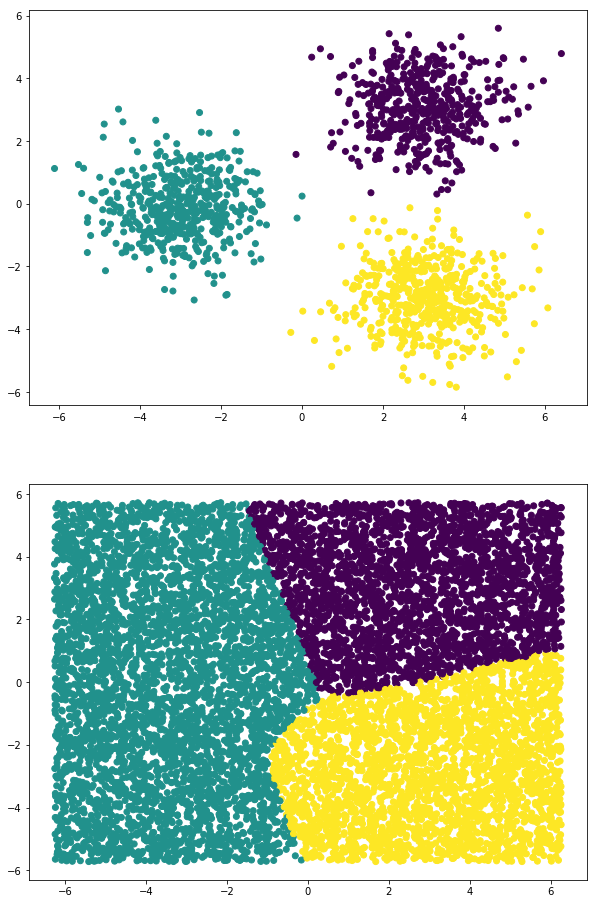

In [83]:
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(Data[:,2:],axis=1))
plt.subplot(2,1,2)
plt.scatter(simX[:,0],simX[:,1],c=np.argmax(simOutput,axis=1))